In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data = pd.read_csv("cardio_train1.csv")
df = pd.DataFrame(data)

df.drop(columns=['id'], inplace=True)

df = pd.DataFrame(data)
X = df.drop(columns=['id', 'cardio'])  # Features
y = df['cardio']  # Target variable
X


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1
69996,22601,1,158,126.0,140,90,2,2,0,0,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0
69998,22431,1,163,72.0,135,80,1,2,0,0,0


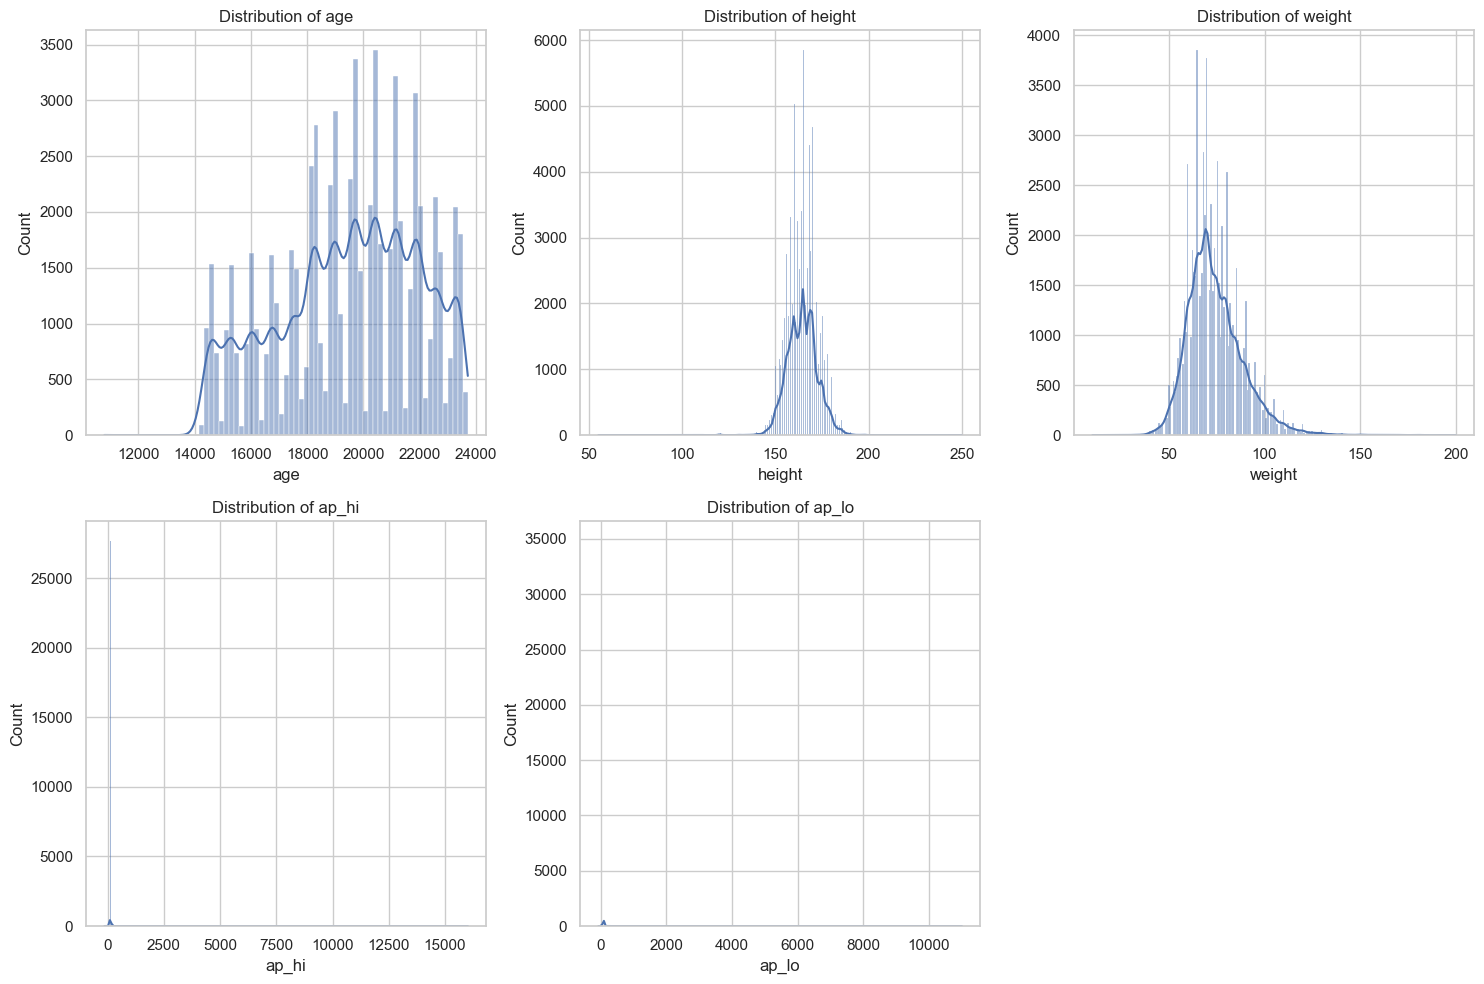

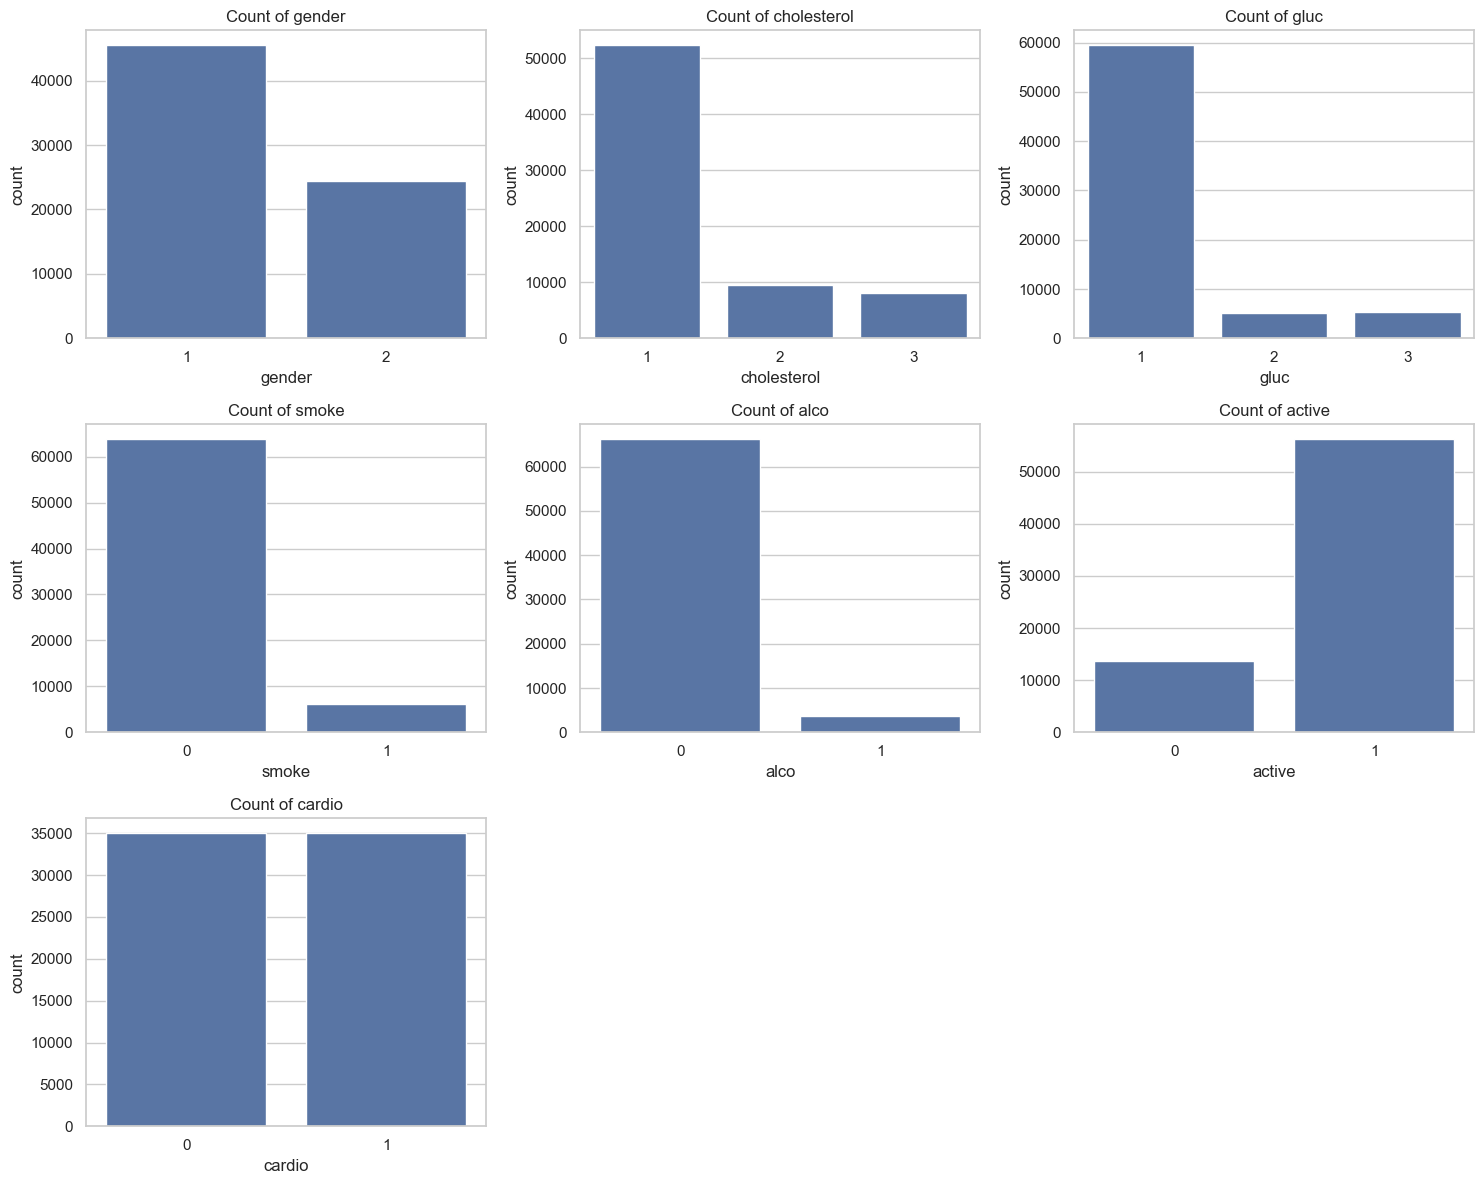

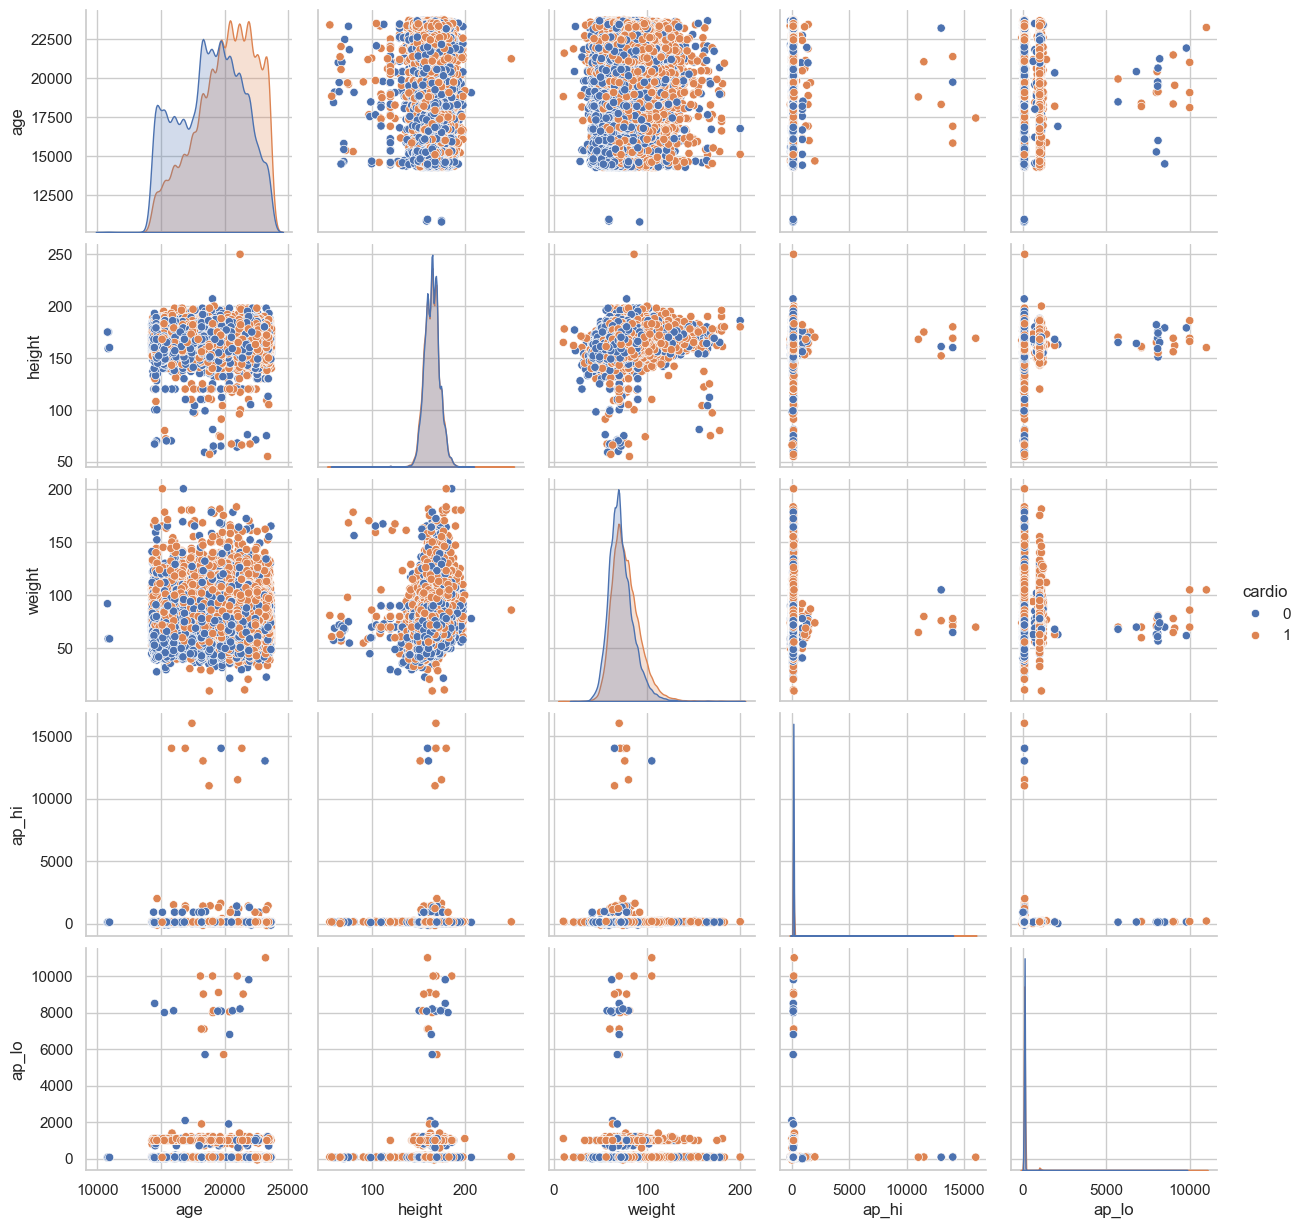

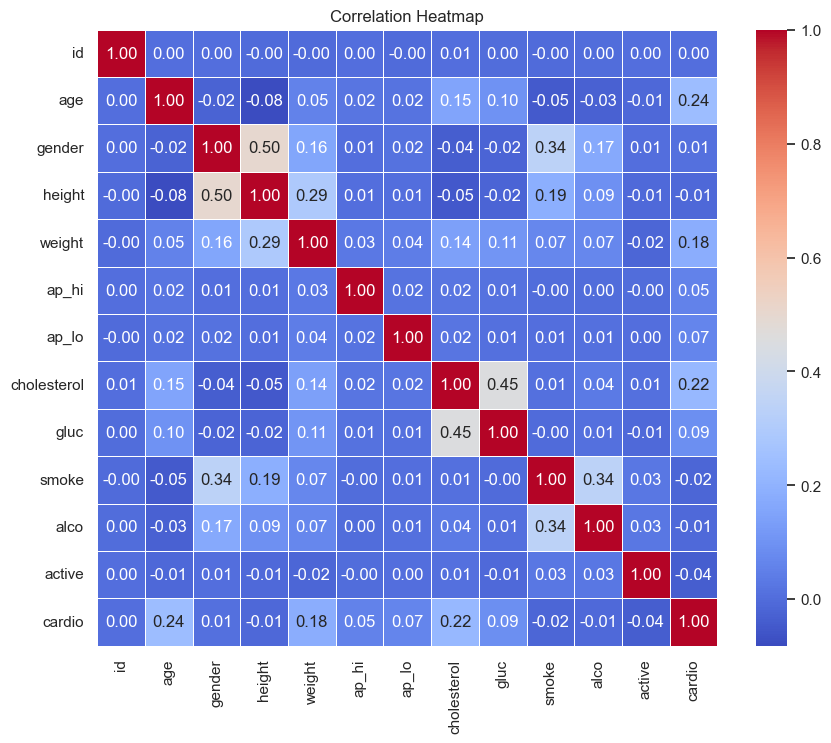

In [15]:
sns.set(style="whitegrid")

numerical_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

categorical_features = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
plt.figure(figsize=(15, 12))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=feature, data=df)
    plt.title(f'Count of {feature}')
plt.tight_layout()
plt.show()

sns.pairplot(df[numerical_features + ['cardio']], hue='cardio', diag_kind='kde')
plt.show()

plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [21]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


print("X_train_scaled:")
print(X_train_scaled)
print("\nX_test_scaled:")
print(X_test_scaled)
print("\ny_train:")
print(y_train)
print("\ny_test:")
print(y_test)

X_train_scaled:
[[ 0.97638644 -0.73377059 -1.26391038 ... -0.31207962 -0.24087574
   0.49410558]
 [-1.11280043  1.36282377 -0.28679781 ... -0.31207962 -0.24087574
  -2.02385896]
 [ 0.67347662  1.36282377  1.17887105 ... -0.31207962 -0.24087574
   0.49410558]
 ...
 [ 1.67008234 -0.73377059  0.56817569 ... -0.31207962 -0.24087574
   0.49410558]
 [-0.50131135 -0.73377059  0.32389755 ... -0.31207962 -0.24087574
  -2.02385896]
 [-1.76195076  1.36282377  1.54528826 ... -0.31207962 -0.24087574
   0.49410558]]

X_test_scaled:
[[ 0.93346072 -0.73377059 -1.01963223 ... -0.31207962 -0.24087574
   0.49410558]
 [ 0.97638644 -0.73377059  0.69031476 ... -0.31207962 -0.24087574
   0.49410558]
 [ 1.54090021 -0.73377059 -1.63032759 ... -0.31207962 -0.24087574
   0.49410558]
 ...
 [ 1.27241195 -0.73377059  0.07961941 ... -0.31207962 -0.24087574
  -2.02385896]
 [ 0.08304544 -0.73377059 -0.89749316 ... -0.31207962 -0.24087574
   0.49410558]
 [-0.4636501   1.36282377  1.42314919 ...  3.20431048 -0.24087574


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


svm_classifier = SVC()
knn_classifier = KNeighborsClassifier()
dt_classifier = DecisionTreeClassifier()
lr_classifier = LogisticRegression()
rf_classifier = RandomForestClassifier()


classifiers = [svm_classifier, knn_classifier, dt_classifier, lr_classifier, rf_classifier]
classifier_names = ['SVM', 'KNN', 'Decision Tree', 'Logistic Regression', 'Random Forest']


for clf, clf_name in zip(classifiers, classifier_names):
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    print(f'{clf_name}: Accuracy: {scores.mean():.4f}, Standard Deviation: {scores.std():.4f}')


for clf, clf_name in zip(classifiers, classifier_names):
    clf.fit(X_train, y_train)
    test_accuracy = clf.score(X_test, y_test)
    print(f'{clf_name} Test Accuracy: {test_accuracy:.4f}')


SVM: Accuracy: 0.6030, Standard Deviation: 0.0060
KNN: Accuracy: 0.6787, Standard Deviation: 0.0037
Decision Tree: Accuracy: 0.6378, Standard Deviation: 0.0072


C:\Users\manas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\manas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

Logistic Regression: Accuracy: 0.6994, Standard Deviation: 0.0048
Random Forest: Accuracy: 0.7169, Standard Deviation: 0.0046
SVM Test Accuracy: 0.6054
KNN Test Accuracy: 0.6821
Decision Tree Test Accuracy: 0.6259
Logistic Regression Test Accuracy: 0.7068


C:\Users\manas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest Test Accuracy: 0.7162


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_classifier = RandomForestClassifier(random_state=42)


rf_classifier.fit(X_train, y_train)


y_pred = rf_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


print('\nClassification Report:')
print(classification_report(y_test, y_pred))


print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7130

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.72      0.72      6988
           1       0.72      0.70      0.71      7012

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000


Confusion Matrix:
[[5057 1931]
 [2087 4925]]
